<a href="https://colab.research.google.com/github/linahourieh/Breast-Cancer/blob/main/Breast_Cancer_BRCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'' handle the missing data in outcome '' 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.impute import KNNImputer

mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Breast-Cancer/main/BRCA.csv')
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [3]:
df.shape

(341, 16)

# Clean Variables

In [4]:
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
df[df['Patient_ID'].isna() == True]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df['Patient_ID'].isna() == True].index

Int64Index([334, 335, 336, 337, 338, 339, 340], dtype='int64')

In [7]:
df.drop(index=[334, 335, 336, 337, 338, 339, 340], inplace=True)

In [8]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [9]:
df[df['Date_of_Last_Visit'].isna() == True]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.0,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.0,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.0,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.0,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.0,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.0,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.0,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.0,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.0,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [10]:
df[df['Patient_Status'].isna() == True].index

Int64Index([7, 22, 99, 111, 182, 196, 206, 219, 221, 285, 286, 305, 321], dtype='int64')

In [11]:
df.drop(index=[7, 22, 99, 111, 182, 196, 206, 219, 221, 285, 286, 305, 321], inplace=True)

In [12]:
'''from sklearn.impute import KNNImputer

df['Patient_Status_map'] = df['Patient_Status'].map({'Alive':1, 'Dead':0})
imputer1 = KNNImputer(n_neighbors=19, weights="uniform").fit(df[['Patient_Status_map']])
df['Patient_Status_2'] = imputer1.transform(df[['Patient_Status_map']])
print(df['Patient_Status_2'].value_counts())'''

'from sklearn.impute import KNNImputer\n\ndf[\'Patient_Status_map\'] = df[\'Patient_Status\'].map({\'Alive\':1, \'Dead\':0})\nimputer1 = KNNImputer(n_neighbors=19, weights="uniform").fit(df[[\'Patient_Status_map\']])\ndf[\'Patient_Status_2\'] = imputer1.transform(df[[\'Patient_Status_map\']])\nprint(df[\'Patient_Status_2\'].value_counts())'

In [13]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    4
Patient_Status        0
dtype: int64

In [14]:
#df.drop(columns=['Patient_Status_map'], inplace=True)

# Feature Engineering

In [15]:
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

In [16]:
df['Recovery_Period'] = df['Date_of_Last_Visit'] - df['Date_of_Surgery']

In [17]:
df['Recovery_Period'] = df['Recovery_Period'].dt.days

In [18]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    4
Patient_Status        0
Recovery_Period       4
dtype: int64

In [19]:
imputer1 = KNNImputer(n_neighbors=15, weights="uniform").fit(df[['Recovery_Period']])
df['Recovery_Period'] = imputer1.transform(df[['Recovery_Period']])
print(df['Recovery_Period'])

0      155.0
1      562.0
2      274.0
3      168.0
4      782.0
       ...  
329     90.0
330    124.0
331    434.0
332    456.0
333    421.0
Name: Recovery_Period, Length: 321, dtype: float64


In [20]:
df['Recovery_Period'] = pd.to_timedelta(df['Recovery_Period'], unit='D')

In [21]:
df['Date_of_Last_Visit']= df['Recovery_Period'] + df['Date_of_Surgery']

In [22]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
Recovery_Period       0
dtype: int64

# Visualization

In [23]:
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Recovery_Period
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,155 days
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,562 days
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,274 days


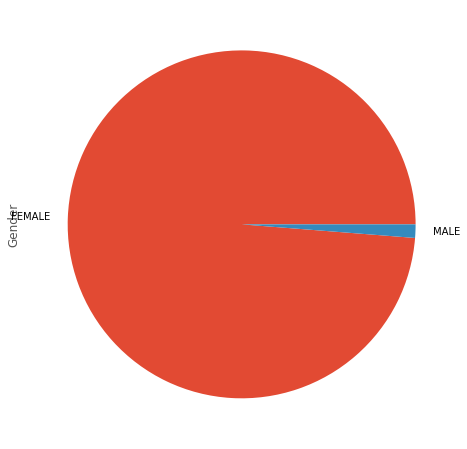

In [24]:
df['Gender'].value_counts(normalize=True).plot(kind='pie', figsize=(8, 8))


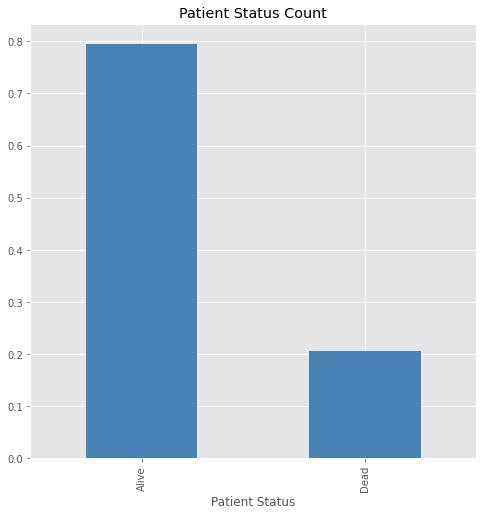

In [25]:
# generate plot
df['Patient_Status'].value_counts(normalize=True).plot(kind='bar', figsize=(8, 8), color='steelblue')
plt.xlabel('Patient Status')
plt.title('Patient Status Count')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


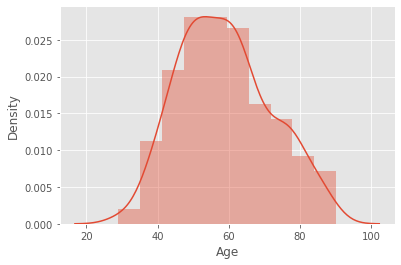

In [26]:
sns.distplot(df['Age'],bins=10)

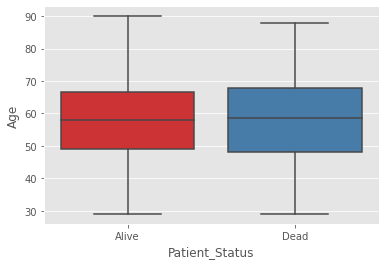

In [27]:
sns.boxplot(x="Patient_Status", y="Age",
                 data=df, palette="Set1")

In [28]:
contigency= pd.crosstab(df['Patient_Status'],df['Histology'], normalize='index')
contigency

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Patient_Status,,,
Alive,0.701961,0.262745,0.035294
Dead,0.712121,0.242424,0.045455


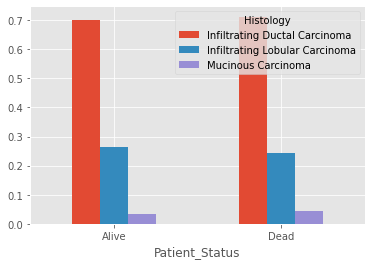

In [29]:
barplot = contigency.plot.bar(rot=0)

In [30]:
contigency= pd.crosstab(df['Patient_Status'],df['Tumour_Stage'], normalize='index')
contigency

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,0.200000,0.564706,0.235294
Dead,0.151515,0.575758,0.272727


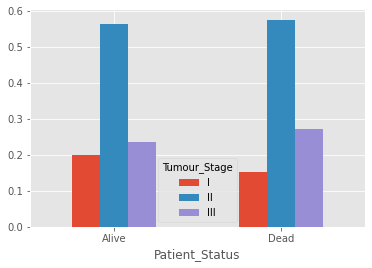

In [31]:
barplot = contigency.plot.bar(rot=0)

In [32]:
contigency= pd.crosstab(df['Patient_Status'],df['HER2 status'],normalize='index')
contigency

HER2 status,Negative,Positive
Patient_Status,,
Alive,0.901961,0.098039
Dead,0.939394,0.060606


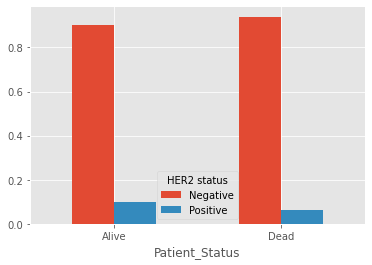

In [33]:
barplot = contigency.plot.bar(rot=0)

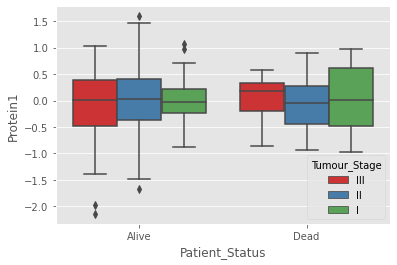

In [73]:
sns.boxplot(x="Patient_Status", y="Protein1", hue='Tumour_Stage',
                 data=df, palette="Set1")

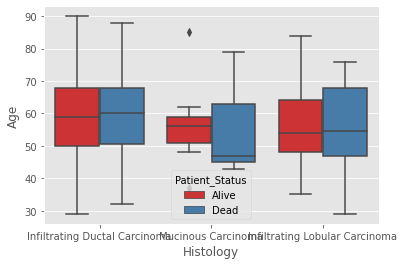

In [72]:
sns.boxplot(x="Histology", y="Age", hue='Patient_Status',
                 data=df, palette="Set1")

In [36]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status', 'Recovery_Period'],
      dtype='object')

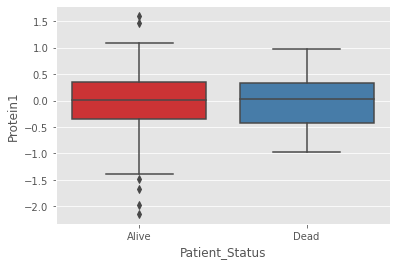

In [37]:
sns.boxplot(x="Patient_Status", y="Protein1",
                 data=df, palette="Set1")

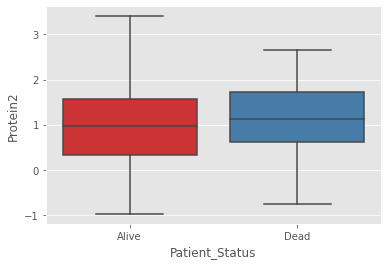

In [38]:
sns.boxplot(x="Patient_Status", y="Protein2",
                 data=df, palette="Set1")

In [76]:
df.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status'],
      dtype='object')

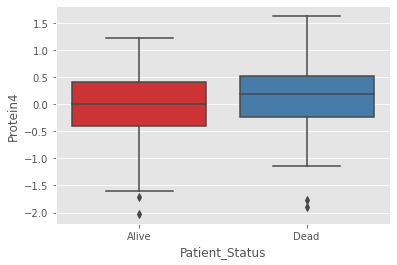

In [77]:
sns.boxplot(x="Patient_Status", y="Protein4",
                 data=df, palette="Set1")

In [40]:
df.drop(columns=['Patient_ID','Gender', 'Date_of_Surgery', 'Date_of_Last_Visit','Recovery_Period'], inplace=True)

# Hypothesis Testing

You now define your null hypothesis and alternate hypothesis. As explained earlier, they are:


H₀ (Null Hypothesis) — that the 2 categorical variables to be compared are independent of each other.


H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other.
And you draw your conclusions based on the following p-value conditions:


p < 0.05 — this means the two categorical variables are correlated.


p > 0.05 — this means the two categorical variables are not correlated

In [66]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Surgery_type'])#,normalize='index')
contigency_pct

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,20,25,12


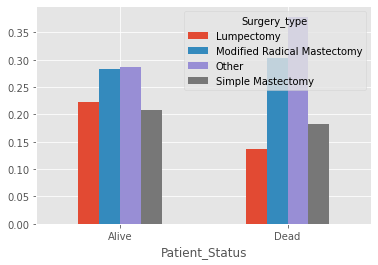

In [44]:
barplot = contigency_pct.plot.bar(rot=0)

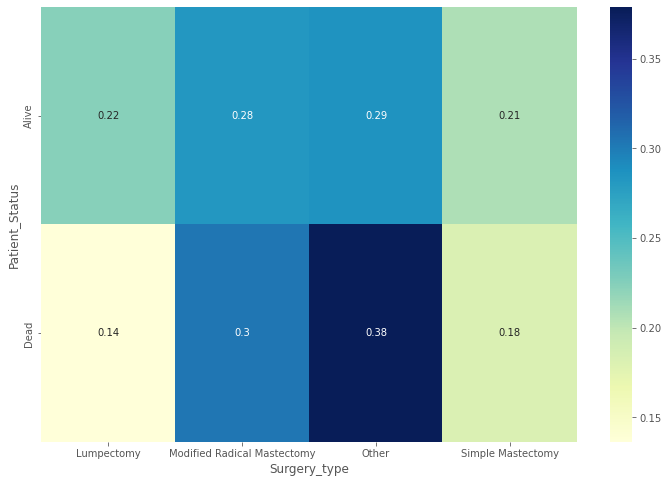

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [74]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

#print(f"The p-value is: {p}")

Chi2_score: 3.660869742407592
The p-value is: 0.30048934106855263
The degree-of-freedom is: 3


The p-value is 37.67% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Smokers and Gender are independent. 

In [86]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Tumour_Stage'])#,normalize='index')
contigency_pct

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,51,144,60
Dead,10,38,18


In [87]:
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

#print(f"The p-value is: {p}")

Chi2_score: 0.9622235045571601
The p-value is: 0.618095840224689
The degree-of-freedom is: 2


In [96]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Histology'])#,normalize='index')
contigency_pct
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

Chi2_score: 0.23620557189716754
The p-value is: 0.8886047118422011
The degree-of-freedom is: 2


In [88]:
f1 = df['Patient_Status'] == "Alive"
f2 = df['Patient_Status'] == "Dead"

In [92]:
np.var(df[f1]['Protein1'])

0.31181800293488404

In [93]:
np.var(df[f2]['Protein1'])

0.2439185279477255

The ratio of the larger sample variance to the smaller sample variance is 12.26 / 7.73 = 1.586, which is less than 4. This means we can assume that the population variances are equal.

In [95]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=df[f1]['Protein1'], b=df[f2]['Protein1'], equal_var=True)

Ttest_indResult(statistic=0.2926863160704916, pvalue=0.769952214779702)

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)


Because the p-value of our test (0.53005) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.